# Sentimental Analysis : MINOR PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
pip install opendatasets

# Loading Data

In [3]:
sf1 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/Emotion_final.csv",sep=',')
sf2 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/emotion-dataset.csv",sep=',')
sf_3 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_1.csv",sep=',')
sf_4 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_2.csv",sep=',')
sf_5 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_3.csv",sep=',',encoding='latin-1')
sf6 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/tweet_emotions.csv",sep=',')
sf7 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/train.txt",sep=';' ,names=["Text", "Emotion"])
sf8 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/test.txt",sep=';' ,names=["Text", "Emotion"])
sf9 = pd.read_table("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/val.txt",sep=';' ,names=["Text", "Emotion"])
sf10 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/hate%20dataset.csv",sep =',',encoding='latin-1')

/tmp/ipython-input-192072100.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_5 = pd.read_csv("https://raw.githubusercontent.com/ANAMIKA1410/Twitter-Sentiment-Analysis-informal/main/ALL%20DATA/SUPERVISED%20DATA/goemotions_3.csv",sep=',',encoding='latin-1')


In [4]:
sf6.rename(columns ={'sentiment':'Emotion','content':'Text'},inplace = True)
sf10.rename(columns ={'label':'Emotion','text':'Text'},inplace = True)

In [5]:
print(' shape of sf1  -> ',sf1.shape,'\n shape of sf2 -> ', sf2.shape,'\n shape of sf_3 -> ', sf_3.shape,'\n shape of sf_4 -> ', sf_4.shape,'\n shape of sf_5  -> ', sf_5.shape ,'\n shape of sf6  -> ', sf6.shape,'\n shape of sf7  -> ', sf7.shape,'\n shape of sf8  -> ', sf8.shape ,'\n shape of sf9  -> ', sf9.shape,'\n shape of sf10  -> ', sf10.shape)

 shape of sf1  ->  (21459, 2) 
 shape of sf2 ->  (34792, 2) 
 shape of sf_3 ->  (70000, 37) 
 shape of sf_4 ->  (70000, 37) 
 shape of sf_5  ->  (70822, 37) 
 shape of sf6  ->  (40000, 3) 
 shape of sf7  ->  (16000, 2) 
 shape of sf8  ->  (2000, 2) 
 shape of sf9  ->  (2000, 2) 
 shape of sf10  ->  (11970, 2)


In [6]:
sf6.drop(['tweet_id'],axis =1, inplace = True)
sf6 = sf6.loc[:,['Text','Emotion']]
sf2 = sf2.loc[:,['Text','Emotion']]
sf10 = sf10[sf10['Emotion'] == 1]

In [7]:
sf10['Emotion'] = sf10['Emotion'].replace(1,'hate')

# Preprocessing



> In the following peice of code, extraction of english words is carried out:
* As this project mainly focuses on english language tweet thus extracting only english words and getting rid of unnecessary characters.



In [8]:
sf_345 = [sf_3,sf_4,sf_5]

In [9]:
for i in sf_345:
  i.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id'],axis = 1,inplace = True)



In [10]:
sf3 = sf_3[sf_3['example_very_unclear']== False]
sf4 = sf_4[sf_4['example_very_unclear']== False]
sf5 = sf_5[sf_5['example_very_unclear']== False]

In [11]:
sf345 =[sf3,sf4,sf5]

In [12]:
for i in sf345:
  i.drop(['example_very_unclear'],inplace = True,axis =1)

/tmp/ipython-input-3318182738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)
/tmp/ipython-input-3318182738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)
/tmp/ipython-input-3318182738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)


In [13]:
sf3 = sf_3[sf_3['example_very_unclear']== False]
sf4 = sf_4[sf_4['example_very_unclear']== False]
sf5 = sf_5[sf_5['example_very_unclear']== False]

In [14]:
sf345 =[sf3,sf4,sf5]

In [15]:
for i in sf345:
  i.drop(['example_very_unclear'],inplace = True,axis =1)

/tmp/ipython-input-3318182738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)
/tmp/ipython-input-3318182738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)
/tmp/ipython-input-3318182738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(['example_very_unclear'],inplace = True,axis =1)


In [16]:
a_3 = np.array(sf3.drop(['text'],axis =1))
a_4 = np.array(sf4.drop(['text'],axis =1))
a_5 = np.array(sf5.drop(['text'],axis =1))

In [17]:
a3 = np.argmax(a_3, axis=1)
a4 = np.argmax(a_4, axis=1)
a5 = np.argmax(a_5, axis=1)

a5

array([ 9, 13,  6, ...,  5,  0,  2])

In [18]:
sf3['Emotion'] = a3
sf4['Emotion'] = a4
sf5['Emotion'] = a5

for i in sf345:
  i.rename(columns = {'text':'Text'},inplace = True)
sf4.head()

/tmp/ipython-input-2435920378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf3['Emotion'] = a3
/tmp/ipython-input-2435920378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf4['Emotion'] = a4
/tmp/ipython-input-2435920378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,Text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Emotion
0,We can hope,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,20
1,Shhh don't give them the idea!,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,"Thank you so much, kind stranger. I really nee...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,Ion know but it would be better for you to jus...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,27
4,I'm honestly surprised. We should have fallen ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [19]:
sf3 = sf3[['Text', 'Emotion']]
sf4 = sf4[['Text', 'Emotion']]
sf5 = sf5[['Text', 'Emotion']]
sf4.head()

,Text,Emotion
0,We can hope,20
1,Shhh don't give them the idea!,2
2,"Thank you so much, kind stranger. I really nee...",15
3,Ion know but it would be better for you to jus...,27
4,I'm honestly surprised. We should have fallen ...,13


In [20]:
emotions = {0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

In [21]:

sf3 = sf3.applymap(lambda s: emotions.get(s) if s in emotions else s)
sf4 = sf4.applymap(lambda s: emotions.get(s) if s in emotions else s)
sf5 = sf5.applymap(lambda s: emotions.get(s) if s in emotions else s)


/tmp/ipython-input-490374792.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sf3 = sf3.applymap(lambda s: emotions.get(s) if s in emotions else s)
/tmp/ipython-input-490374792.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sf4 = sf4.applymap(lambda s: emotions.get(s) if s in emotions else s)
/tmp/ipython-input-490374792.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sf5 = sf5.applymap(lambda s: emotions.get(s) if s in emotions else s)


In [22]:
sf5.head()

,Text,Emotion
0,Worst ending ever! I won't spoil it but this o...,disappointment
1,Happy cake day u/sneakpeekbot!,excitement
2,Was he rejected because of his methodology or ...,confusion
3,"thanks, I agree",approval
4,Why would you doubt it dumbass?,anger


In [23]:
# list1 =['joy','amusement','approval','sadness','disappointment','remorse','grief','disapproval','neutral','admiration','gratitude']
# list2 =['neutral']
# sf5 = sf5[sf5.Emotion.isin(list1)== False]
# sf4 = sf4[sf4.Emotion.isin(list1)== False]

In [24]:
sfs = [sf1,sf2,sf3,sf4,sf5,sf6,sf7,sf8,sf9,sf10]

In [25]:
for i in sfs :
    print(i['Emotion'].unique())


['sadness' 'anger' 'love' 'surprise' 'fear' 'happy']
['neutral' 'joy' 'sadness' 'fear' 'surprise' 'anger' 'shame' 'disgust']
['sadness' 'neutral' 'love' 'gratitude' 'disapproval' 'amusement'
 'disappointment' 'admiration' 'realization' 'annoyance' 'confusion'
 'optimism' 'curiosity' 'excitement' 'caring' 'disgust' 'remorse' 'joy'
 'approval' 'embarrassment' 'surprise' 'anger' 'grief' 'pride' 'desire'
 'relief' 'fear' 'nervousness']
['optimism' 'anger' 'gratitude' 'neutral' 'excitement' 'fear' 'curiosity'
 'caring' 'disappointment' 'admiration' 'desire' 'disgust' 'confusion'
 'amusement' 'annoyance' 'surprise' 'disapproval' 'sadness' 'relief'
 'realization' 'approval' 'nervousness' 'joy' 'embarrassment' 'love'
 'grief' 'pride' 'remorse']
['disappointment' 'excitement' 'confusion' 'approval' 'anger' 'neutral'
 'amusement' 'sadness' 'curiosity' 'annoyance' 'disapproval' 'admiration'
 'desire' 'surprise' 'realization' 'love' 'caring' 'optimism' 'gratitude'
 'embarrassment' 'joy' 'relief' '

In [26]:
emotion_list = []

for i in sfs:
  for j in i['Emotion'].unique():
      emotion_list.append(j)
emotion_list

['sadness',
 'anger',
 'love',
 'surprise',
 'fear',
 'happy',
 'neutral',
 'joy',
 'sadness',
 'fear',
 'surprise',
 'anger',
 'shame',
 'disgust',
 'sadness',
 'neutral',
 'love',
 'gratitude',
 'disapproval',
 'amusement',
 'disappointment',
 'admiration',
 'realization',
 'annoyance',
 'confusion',
 'optimism',
 'curiosity',
 'excitement',
 'caring',
 'disgust',
 'remorse',
 'joy',
 'approval',
 'embarrassment',
 'surprise',
 'anger',
 'grief',
 'pride',
 'desire',
 'relief',
 'fear',
 'nervousness',
 'optimism',
 'anger',
 'gratitude',
 'neutral',
 'excitement',
 'fear',
 'curiosity',
 'caring',
 'disappointment',
 'admiration',
 'desire',
 'disgust',
 'confusion',
 'amusement',
 'annoyance',
 'surprise',
 'disapproval',
 'sadness',
 'relief',
 'realization',
 'approval',
 'nervousness',
 'joy',
 'embarrassment',
 'love',
 'grief',
 'pride',
 'remorse',
 'disappointment',
 'excitement',
 'confusion',
 'approval',
 'anger',
 'neutral',
 'amusement',
 'sadness',
 'curiosity',
 'anno

In [27]:
emotion_set = set(emotion_list)
print(len(emotion_set))
print(emotion_set)


37
{'annoyance', 'love', 'anger', 'empty', 'curiosity', 'admiration', 'excitement', 'embarrassment', 'surprise', 'remorse', 'desire', 'worry', 'joy', 'grief', 'nervousness', 'sadness', 'boredom', 'caring', 'disapproval', 'disappointment', 'happiness', 'optimism', 'relief', 'confusion', 'fun', 'hate', 'fear', 'realization', 'disgust', 'approval', 'happy', 'shame', 'pride', 'amusement', 'gratitude', 'neutral', 'enthusiasm'}


In [28]:
sf1.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [29]:
sf2.head()

,Text,Emotion
0,Why ?,neutral
1,Sage Act upgrade on my to do list for tommorow.,joy
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,sadness
3,Such an eye ! The true hazel eye-and so brill...,joy
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,joy


In [30]:
sf3.head()


,Text,Emotion
0,That game hurt.,sadness
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral
5,Right? Considering it’s such an important docu...,gratitude


In [31]:
sf4.head()

,Text,Emotion
0,We can hope,optimism
1,Shhh don't give them the idea!,anger
2,"Thank you so much, kind stranger. I really nee...",gratitude
3,Ion know but it would be better for you to jus...,neutral
4,I'm honestly surprised. We should have fallen ...,excitement


In [32]:
sf5.head()

,Text,Emotion
0,Worst ending ever! I won't spoil it but this o...,disappointment
1,Happy cake day u/sneakpeekbot!,excitement
2,Was he rejected because of his methodology or ...,confusion
3,"thanks, I agree",approval
4,Why would you doubt it dumbass?,anger


In [33]:
sf6.head()

,Text,Emotion
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [34]:
sf7.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [35]:
sf8.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [36]:
sf9.head()

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [37]:
sf10.shape

(5035, 2)

In [38]:
sf_combined = pd.concat(sfs)

In [39]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
admiration,17135
amusement,8866
anger,18070
annoyance,11928
approval,15529
boredom,179
caring,5150
confusion,6601
curiosity,7708


In [40]:
sf_combined.loc[(sf_combined.Emotion == 'empty')].tail(10)

,Text,Emotion
39492,@niariley follow me too,empty
39521,@Catwoman123 Something like that,empty
39543,http://twitpic.com/4wuaq - another prof pic.,empty
39549,@NukeSpoon precisely. The more followers you ...,empty
39689,"right im off for a shower my little treasures,...",empty
39702,"Here we go again, back to work. Happy Mothers ...",empty
39742,@PhilippaJane the &quot;no pants&quot; idea co...,empty
39749,@sloanyxxx Thanks,empty
39845,@xxxRobyn Yeah *fingers crossed*,empty
39975,@lexia Or even listen to Susan's green policies,empty


In [41]:
sf_combined.loc[(sf_combined.Emotion == 'disapproval')].head(10)

,Text,Emotion
6,"He isn't as big, but he's still quite popular....",disapproval
36,"I can't stand [NAME]. Especially since her ""ta...",disapproval
55,There has to be some repercussions for this ju...,disapproval
77,>Did you just call me a liar? Sick reference.,disapproval
79,It doesn't matter. You can pick someone with t...,disapproval
88,"You're both wrong NBA is an initialism, can't ...",disapproval
96,"That's professor [NAME] to you, savage!",disapproval
119,It’s the format. It’s like one of those bad [N...,disapproval
154,"Ones with close ties to SA, anyway. An escaped...",disapproval
207,Hmmm I dont think I listen to only [NAME] if I...,disapproval


In [42]:
#70715	She just likes to fight, donï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t worr - approval

In [43]:
print(len(emotion_set),emotion_set)

37 {'annoyance', 'love', 'anger', 'empty', 'curiosity', 'admiration', 'excitement', 'embarrassment', 'surprise', 'remorse', 'desire', 'worry', 'joy', 'grief', 'nervousness', 'sadness', 'boredom', 'caring', 'disapproval', 'disappointment', 'happiness', 'optimism', 'relief', 'confusion', 'fun', 'hate', 'fear', 'realization', 'disgust', 'approval', 'happy', 'shame', 'pride', 'amusement', 'gratitude', 'neutral', 'enthusiasm'}


<Axes: xlabel='Emotion'>

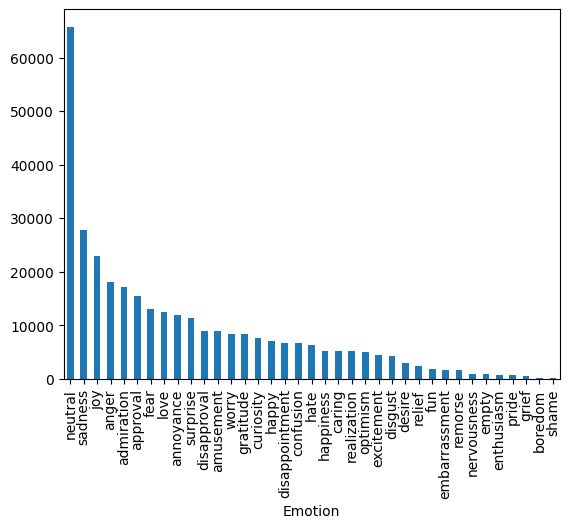

In [44]:
sf_combined['Emotion'].value_counts().plot(kind = 'bar')

In [45]:

emotions_to_exclude = ['realization', 'shame', 'approval', 'disapproval', 'joy', 'disappointment',
                       'boredom', 'embarrassment', 'annoyance', 'worry', 'nervousness', 'fun',
                       'desire', 'enthusiasm', 'amusement','curiosity', 'confusion', 'disgust', 'admiration','pride', 'optimism','relief',  'empty']

sf_combined = sf_combined[~sf_combined['Emotion'].isin(emotions_to_exclude)]

Dropping data having ***approval*** and ***disapproval*** because these emotions occupy a greater extent of other emotions and also are biased somehow to neutral

Data for ***shame***, ***empty*** is insignificant and it cannot be generalised to the narrowed class emotions affectively

Data for relization is significant but it cannot be generalised to the narrowed class emotions affectively

<font color='navy'>There are total of 37 emotions in these datasets as follows:  </font>


{'optimism', 'happiness', 'empty', 'nervousness', 'disapproval', 'worry', 'gratitude', 'sadness', 'curiosity', 'surprise', 'fear', 'anger', 'embarrassment', 'relief', 'enthusiasm', 'realization', 'approval', 'desire', 'happy', 'confusion', 'disappointment', 'caring', 'remorse', 'admiration',
'grief', 'amusement', 'hate', 'neutral', 'love', 'pride', 'joy', 'shame', 'disgust', 'excitement', 'boredom', 'fun', 'annoyance'}

<font color='navy'>
These 37 emotions are narrowed down to 9 emotions in order to get more accurate results.
</font>

In [46]:
emotion_dict = {
 'happy':               ['happiness','happy'],
 'sadness':             ['sadness','remorse','grief'],
 'love':                ['love','caring'],
 'anger':               ['anger'],
 'fear':                ['fear'],
 'excitement':          ['excitement'],
 'surprise':            ['surprise'],
 'neutral':             ['neutral'],
 'hate':                ['hate'],
 'gratitude':           ['gratitude']
 }

In [47]:
#sf_combined = sf_combined.applymap(lambda s: emotions_dict.get(s) if s in emotions else s)
for k,v in emotion_dict.items():

        sf_combined.replace(v,k,inplace = True)


In [48]:
sf_combined.sample(10)

,Text,Emotion
18078,@_CaitlinOhh negative you can wait til later ;),surprise
1684,That town is sadder than [NAME] town. I donï¿½...,neutral
43515,"It just so happened that PD, sick kids , and f...",sadness
32672,Cant wait until the mail comes tomorrow. @_kbe...,surprise
57781,Someone in my class said foreskin instead of f...,neutral
4665,i cannot seem to shake this feeling of being c...,sadness
54608,Time for a shot bud!!!!!,neutral
3183,@Nasnous Thanks bro but I'm awake already How...,love
35394,We're worse to animals than we were 100 years ...,anger
32251,The could be more than just a sport. I am now...,anger


In [49]:
sf_combined.shape

(187045, 2)

In [50]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
anger,18070
excitement,4376
fear,12951
gratitude,8436
happy,12238
hate,6358
love,17604
neutral,65731
sadness,29956


In [51]:
def english_only(tweets):

  alpha = (list(string.ascii_letters))
  valid = []
  final = []
  for i in alpha :
    valid.append(i)
  for i in range(0,10):
    valid.append(str(i))
  symbols = ['!','?','.','@','#','"',',',"'",'/',':','(',')']
  for i in symbols:
    valid.append(i)

  def replace(l,v):
    m =[]

    for i in l:
      for j in i:
        if j not in valid:
          i = i.replace(j," ")

      m.append(i)
    return m

  final = replace(tweets,valid)


  def spaceremoval(tweets):
    new_lst = []
    pattern=re.compile(r'# +')
    p2 = re.compile(r'\bhttps:\/\/\S+')
    for i in tweets:
        i=re.sub(pattern,"",i)
        i=re.sub(p2,"",i)                   # change made 1 https links removed
        new_lst.append(i.strip())           # change made 2 any leading (spaces at the beginning) and trailing (spaces at the end) removed
    return new_lst
  final_1 = spaceremoval(final)
  return final_1


mylist =["Do you like my pokemon? 🥺💕 \n#成都同城 #成都资源 #成都 ","@jk cdbsa jf #  # https://t.co/aAygEyHKTK"]
try1 = english_only(mylist)
print(try1)
# try2 = spaceremoval(try1)
# print(try2)

['Do you like my pokemon?', '@jk cdbsa jf']


In [52]:
sf_combined["Text"] = english_only(sf_combined["Text"])

<Axes: xlabel='Emotion'>

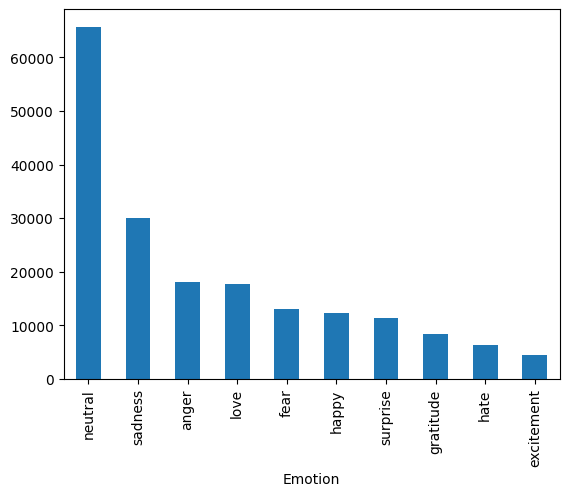

In [53]:
sf_combined['Emotion'].value_counts().plot(kind = 'bar')

In [54]:
sf_combined.shape

(187045, 2)

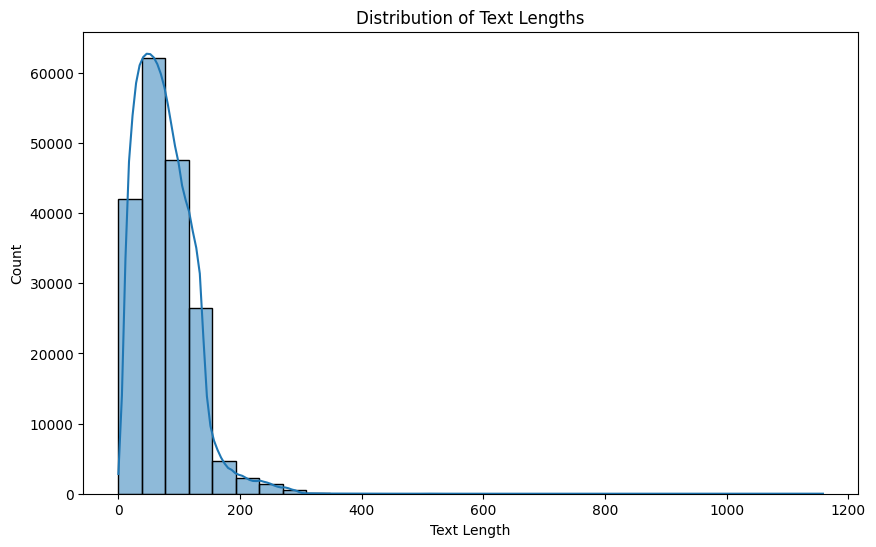

In [55]:
tweet_lengths = sf_combined['Text'].str.len()
plt.figure(figsize=(10,6))
sns.histplot(tweet_lengths, bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

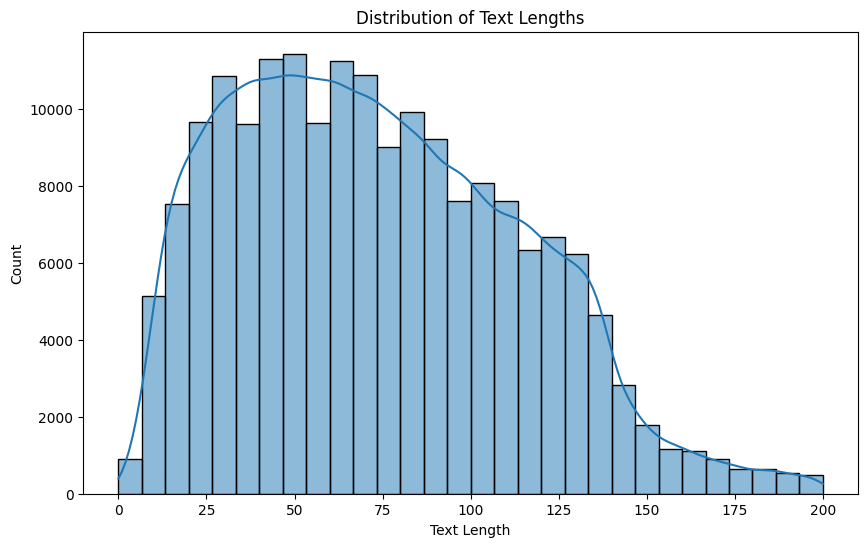

In [56]:
sf_combined = sf_combined[tweet_lengths <= 200]
tweet_lengths = sf_combined['Text'].str.len()
plt.figure(figsize=(10,6))
sns.histplot(tweet_lengths, bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

### mitigating the skewedness of data

In [57]:
neutral = sf_combined[sf_combined['Emotion']=='neutral']
happy = sf_combined[sf_combined['Emotion']=='happy']
sad = sf_combined[sf_combined['Emotion']=='sadness']
gratitude = sf_combined[sf_combined['Emotion']=='gratitude']
anger = sf_combined[sf_combined['Emotion']=='anger']
fear = sf_combined[sf_combined['Emotion']=='fear']
love = sf_combined[sf_combined['Emotion']=='love']
excitement = sf_combined[sf_combined['Emotion']=='excitement']
hate = sf_combined[sf_combined['Emotion']=='hate']
surprise = sf_combined[sf_combined['Emotion']=='surprise']


In [58]:
neutral_under     = neutral.sample(10000, replace = True)
happy_under       = happy.sample(10000, replace = True)
sad_under         = sad.sample(10000, replace = True)
gratitude_under   = gratitude.sample(10000, replace = True)
fear_under        = fear.sample(10000, replace = True)
love_over         = love.sample(10000, replace = True)
excitement_over   = excitement.sample(10000, replace = True)
hate_over         = hate.sample(10000, replace = True)
anger_roundoff    = anger.sample(10000,replace = True)
surprise_roundoff = surprise.sample(10000, replace = True)

In [59]:
sf_sampled = pd.concat([neutral_under,happy_under,sad_under,gratitude_under, fear_under,love_over,excitement_over,hate_over,anger_roundoff,surprise_roundoff],axis =0)
print(sf_sampled.Emotion.value_counts())

Emotion
neutral       10000
happy         10000
sadness       10000
gratitude     10000
fear          10000
love          10000
excitement    10000
hate          10000
anger         10000
surprise      10000
Name: count, dtype: int64


<Axes: xlabel='Emotion', ylabel='count'>

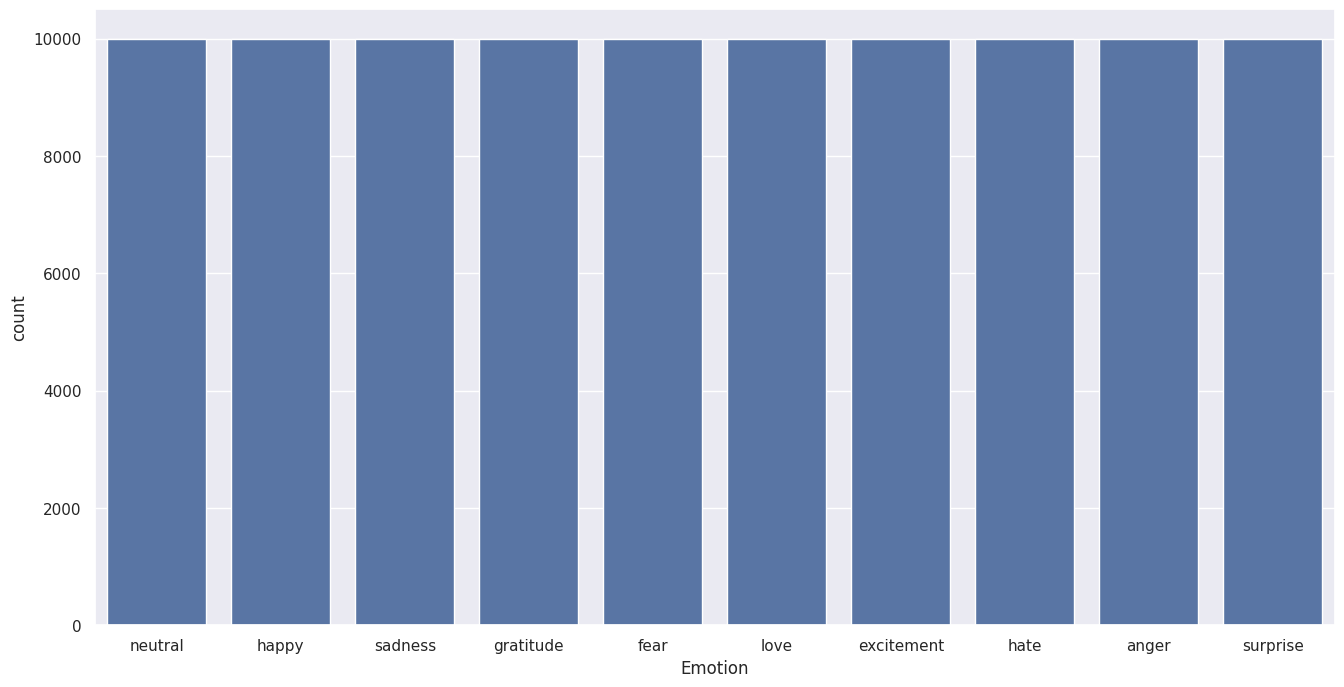

In [60]:

sns.set(rc={'figure.figsize':(16,8)})

sns.countplot(x = 'Emotion' , data = sf_sampled)


In [61]:
sf_sampled.groupby('Emotion').count()

,Text
Emotion,
anger,10000
excitement,10000
fear,10000
gratitude,10000
happy,10000
hate,10000
love,10000
neutral,10000
sadness,10000


In [62]:
sf_combined.groupby('Emotion').count()

,Text
Emotion,
anger,17500
excitement,4376
fear,12486
gratitude,8436
happy,11837
hate,5306
love,17410
neutral,65703
sadness,29156


In [63]:
sf_combined.shape

(183434, 2)

In [64]:
sf_combined.loc[(sf_combined.Emotion == 'happy')].head(10)

,Text,Emotion
8,i have been with petronas for years i feel tha...,happy
11,i do feel that running is a divine experience ...,happy
15,i do not feel reassured anxiety is on each side,happy
22,i have the feeling she was amused and delighted,happy
23,i was able to help chai lifeline with your sup...,happy
29,i feel more superior dead chicken or grieving ...,happy
30,i get giddy over feeling elegant in a perfectl...,happy
35,i am not sure what would make me feel content ...,happy
36,i have been feeling the need to be creative,happy
37,i do however want you to know that if somethin...,happy


***END OF PREPROCESSING***

##**Model Training:**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Transformers
from sklearn. feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [66]:
# cols_to_scale = ['Emotion']

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# sf3['Emotion'] = le.fit_transform(sf3['Emotion'])
# sf3

In [67]:
X=sf_combined['Text']
y=sf_combined['Emotion']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=40)

**Logistic Regression Algorithm:**

In [69]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()), ('lr', LogisticRegression())])

In [70]:
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [71]:
print("Logistic Regression -")
print(f"Test score : {pipe_lr.score(x_test,y_test)}\nTrain score : {pipe_lr.score(x_train,y_train)}")

Logistic Regression -
Test score : 0.6645527066562483
Train score : 0.7519528359929285


In [72]:
y_pred = pipe_lr.predict(x_test)
y_pred

array(['gratitude', 'happy', 'hate', ..., 'gratitude', 'happy', 'neutral'],
      dtype=object)

In [73]:
from sklearn.metrics import recall_score
print('recall score = ',recall_score(y_test,y_pred,average='macro'))

recall score =  0.5729618600871563


In [74]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test,y_pred))

accuracy =  0.6645527066562483


In [75]:
from sklearn.metrics import precision_score
print('precision = ',precision_score(y_test,y_pred,average = 'macro'))

precision =  0.6697950544485813




```
# This is formatted as code
```

 **Naive Bayes Algorithm:**



In [76]:
pipe_nb = Pipeline(steps = [('cv',CountVectorizer()),('nb',MultinomialNB() )])

In [77]:
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [78]:
print("Multinomial Naive Bayes -")
print(f"Test score : {pipe_nb.score(x_test,y_test)}\nTrain score : {pipe_nb.score(x_train,y_train)}")

Multinomial Naive Bayes -
Test score : 0.5861786992785885
Train score : 0.6603506148610235


In [79]:
y_pred_nb = pipe_nb.predict(x_test)


In [80]:
print('recall score = ',recall_score(y_test,y_pred_nb,average='macro'))

recall score =  0.4163669652623299


In [81]:
print('accuracy = ',accuracy_score(y_test,y_pred_nb))
print('precission = ',precision_score(y_test,y_pred_nb,average = 'macro'))

accuracy =  0.5861786992785885
precission =  0.6569120732889147


In [82]:
# print("F1-Score = ",f1_score(y_test,y_pred_nb,average='macro'))

**Decision Tree Algorithm:**

In [83]:
# from sklearn.tree import DecisionTreeClassifier
# pipe_tree = Pipeline(steps=[('cv',CountVectorizer()),('dtree',DecisionTreeClassifier())])

In [84]:
# pipe_tree.fit(x_train,y_train)

In [85]:
# print("Decision Tree -")
# print(f"Test score : {pipe_tree.score(x_test,y_test)}\nTrain score : {pipe_tree.score(x_train,y_train)}")

In [86]:
# y_pred_dtree = pipe_tree.predict(x_test)

In [87]:
# print('recall score = ',recall_score(y_test,y_pred_dtree,average='macro'))

In [88]:
# print('accuracy = ',accuracy_score(y_test,y_pred_dtree))
# print('precision = ',precision_score(y_test,y_pred_dtree,average = 'macro'))

In [89]:
# from sklearn.metrics import f1_score
# print("F1-Score = ",f1_score(y_test,y_pred,average='macro'))

**SVM Algorithm:**

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

# Assuming you have x_train, y_train, and x_test data ready

pipe_svm = Pipeline(steps=[('cv', CountVectorizer()), ('svm', SVC())])
pipe_svm.fit(x_train, y_train)

print("Support Vector Classifier -")
print(f"Test score : {pipe_svm.score(x_test, y_test)}\nTrain score : {pipe_svm.score(x_train, y_train)}")
y_pred_svm = pipe_svm.predict(x_test)
print('recall score = ', recall_score(y_test, y_pred_svm, average='macro'))
print('accuracy = ', accuracy_score(y_test, y_pred_svm))
print('precision = ', precision_score(y_test, y_pred_svm, average='macro'))
print("F1-Score = ", f1_score(y_test, y_pred_svm, average='macro'))


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('knn',KNeighborsClassifier())])

In [ ]:
pipe_knn.fit(x_train,y_train)

In [ ]:
print("KNN-")
print(f"Test score : {pipe_knn.score(x_test,y_test)}\nTrain score : {pipe_knn.score(x_train,y_train)}")

In [ ]:
y_pred_knn = pipe_knn.predict(y_test)
y_pred_knn

In [ ]:
# cols_to_scale = ['Emotion']

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# sf_combined['Emotion'] = le.fit_transform(sf_combined['Emotion'])
# sf_combined

In [ ]:
# X=sf_combined['Text']
# y=sf_combined['Emotion']

# x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [ ]:
# from sklearn.feature_extraction import DictVectorizer
# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(x_train)
# X_test = vectorizer.transform(x_test)

In [ ]:
# def train_test(clf, X_train, X_test, y_train, y_test):
#     clf.fit(X_train, y_train)
#     train_acc = accuracy_score(y_train, clf.predict(X_train))
#     test_acc = accuracy_score(y_test, clf.predict(X_test))
#     return train_acc, test_acc

In [ ]:
# lr = LogisticRegression()
# mnb = MultinomialNB()
# #knn =KNeighborsClassifier()
# # svc = SVC()
# # lsvc = LinearSVC(random_state=123)
# dtree = DecisionTreeClassifier()

# clifs = [lr, mnb, dtree]

# # train and test them
# print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
# print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
# for clf in clifs:
#     clf_name = clf.__class__.__name__
#     train_acc, test_acc = train_test(clf, x_train, x_test, y_train, y_test)
#     print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

## Using CNN with LSTM

> Add blockquote



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
le = LabelEncoder()
sf_combined['Emotion'] = le.fit_transform(sf_combined['Emotion'])

In [ ]:
sf_combined.sample(5)

In [ ]:
y = testLabels = sf_combined['Emotion'].astype(np.float32)
X = sf_combined['Text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)

X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')

x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")
print(f"Classes: {label_encoder.classes_}")

In [ ]:
model_cnn_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(units=100, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_cnn_lstm.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn_lstm.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_cnn_lstm = model_cnn_lstm.fit(
    x_train_pad, y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

from sklearn.metrics import recall_score, precision_score, f1_score

print("CNN with LSTM -")
train_score = model_cnn_lstm.evaluate(x_train_pad, y_train_encoded, verbose=0)[1]
test_score = model_cnn_lstm.evaluate(x_test_pad, y_test_encoded, verbose=0)[1]

print(f"Test score : {test_score}\nTrain score : {train_score}")

y_pred_cnn_lstm = model_cnn_lstm.predict(x_test_pad)
y_pred_cnn_lstm_classes = np.argmax(y_pred_cnn_lstm, axis=1)

print('recall score = ', recall_score(y_test_encoded, y_pred_cnn_lstm_classes, average='macro'))
print('accuracy = ', accuracy_score(y_test_encoded, y_pred_cnn_lstm_classes))
print('precision = ', precision_score(y_test_encoded, y_pred_cnn_lstm_classes, average='macro'))
print("F1-Score = ", f1_score(y_test_encoded, y_pred_cnn_lstm_classes, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_cnn_lstm_classes, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_cnn_lstm_classes))

## Using CNN with Bi-LSTM


In [ ]:
model_cnn_bilstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(units=100, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_cnn_bilstm.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn_bilstm.summary()

In [ ]:
history_cnn_bilstm = model_cnn_bilstm.fit(
    x_train_pad, y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)
print("CNN with Bi-LSTM -")
train_score = model_cnn_bilstm.evaluate(x_train_pad, y_train_encoded, verbose=0)[1]
test_score = model_cnn_bilstm.evaluate(x_test_pad, y_test_encoded, verbose=0)[1]

print(f"Test score : {test_score}\nTrain score : {train_score}")

y_pred_cnn_bilstm = model_cnn_bilstm.predict(x_test_pad)
y_pred_cnn_bilstm_classes = np.argmax(y_pred_cnn_bilstm, axis=1)

print('recall score = ', recall_score(y_test_encoded, y_pred_cnn_bilstm_classes, average='macro'))
print('accuracy = ', accuracy_score(y_test_encoded, y_pred_cnn_bilstm_classes))
print('precision = ', precision_score(y_test_encoded, y_pred_cnn_bilstm_classes, average='macro'))
print("F1-Score = ", f1_score(y_test_encoded, y_pred_cnn_bilstm_classes, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_cnn_bilstm_classes, target_names=label_encoder.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_cnn_bilstm_classes))

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history_cnn_lstm.history['accuracy'], label='Train Accuracy')
axes[0].plot(history_cnn_lstm.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('CNN-LSTM: Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_cnn_bilstm.history['accuracy'], label='Train Accuracy')
axes[1].plot(history_cnn_bilstm.history['val_accuracy'], label='Val Accuracy')
axes[1].set_title('CNN-BiLSTM: Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import pickle

model_data = {
    'model': model_cnn_bilstm,
    'tokenizer': tokenizer,
    'label_encoder': label_encoder,
    'max_len': max_len
}

with open('emotion_detection.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Model saved successfully as 'emotion_detection.pkl'")
# Cell 11 (Optional): Load and test the saved model
# Load the saved model
with open('emotion_detection.pkl', 'rb') as file:
    loaded_model_data = pickle.load(file)

loaded_model = loaded_model_data['model']
loaded_tokenizer = loaded_model_data['tokenizer']
loaded_label_encoder = loaded_model_data['label_encoder']
loaded_max_len = loaded_model_data['max_len']

print("Model loaded successfully!")

# Test prediction with loaded model
def predict_emotion(text):
    # Preprocess the text
    sequence = loaded_tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=loaded_max_len, padding='post')

    # Predict
    prediction = loaded_model.predict(padded, verbose=0)
    predicted_class = np.argmax(prediction, axis=1)[0]
    emotion = loaded_label_encoder.inverse_transform([predicted_class])[0]
    confidence = prediction[0][predicted_class]

    return emotion, confidence

# Example usage
test_text = "I am so happy today!"
emotion, confidence = predict_emotion(test_text)
print(f"\nText: '{test_text}'")
print(f"Predicted Emotion: {emotion}")
print(f"Confidence: {confidence:.4f}")